
# TomoPy with LPrec

Here is an example on how to use the [log-polar based method](https://github.com/math-vrn/lprec) for reconstruction with TomoPy.

To reconstruct the image with the LPrec instead of TomoPy, change the ``algorithm`` keyword to ``tomopy.lprec``. Specify which LPrec algorithm to reconstruct with the ``lpmethod`` keyword.

These two cells are an abbreviated setup for [Reconstruction with TomoPy](tomopy.rst).

In [1]:
import dxchange
import matplotlib.pyplot as plt
import tomopy

In [2]:
proj, flat, dark, theta = dxchange.read_aps_32id(
    fname='../../../source/tomopy/data/tooth.h5',
    sino=(0, 2),
)
proj = tomopy.normalize(proj, flat, dark)
rot_center = 296

Note that with LPrec, there can be no negative values after the transmission tomography linearization:

In [3]:
proj = tomopy.minus_log(proj)
proj[proj < 0] = 0  # no values less than zero with lprec

Reconstruction using FBP method with the log-polar coordinates.
$$ \hat{f}=\mathcal{W}\mathcal{R}^* g $$

Reconstructing 48 slice groups with 2 master threads...


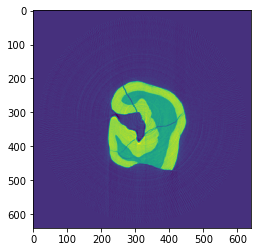

In [4]:
recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.lprec,
                     lpmethod='fbp',
                     filter_name='parzen')
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

Reconstruction using the gradient descent method with the log-polar coordinates.
$$ \hat{f} = \text{argmin}_f\lVert\mathcal{R}f-g \rVert_2^2 $$

Reconstructing 1 slice groups with 1 master threads...


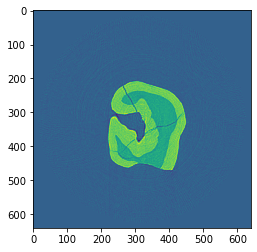

In [5]:
recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.lprec,
                     lpmethod='grad',
                     ncore=1,
                     num_iter=64,
                     reg_par=-1)
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

Reconstruction using the conjugate gradient method with the log-polar coordinates.
$$ \hat{f} = \text{argmin}_f\lVert\mathcal{R}f-g \rVert_2^2 $$

Reconstructing 1 slice groups with 1 master threads...


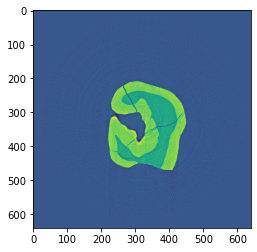

In [6]:
recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.lprec,
                     lpmethod='cg',
                     ncore=1,
                     num_iter=16,
                     reg_par=-1)
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

Reconstruction using the TV method with the log-polar coordinates. It gives piecewise constant reconstructions and can be used for denoising.
$$ \hat{f} = \text{argmin}_f\lVert\mathcal{R}f-g \rVert_2^2 + \lambda \lVert\nabla f\rVert_1 $$

Reconstructing 1 slice groups with 1 master threads...


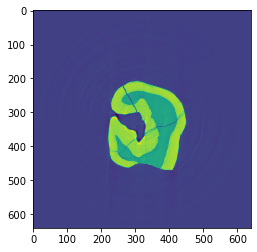

In [7]:
recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.lprec,
                     lpmethod='tv',
                     ncore=1,
                     num_iter=512,
                     reg_par=5e-4)
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

Reconstruction using the TV-entropy method with the log-polar coordinates. It can be used for suppressing Poisson noise.
$$ \hat{f} = \text{argmin}_f \lambda \lVert\nabla f\rVert_1+\int_\Omega\mathcal{R}f-g\log(\mathcal{R}f)df $$

Reconstructing 1 slice groups with 1 master threads...


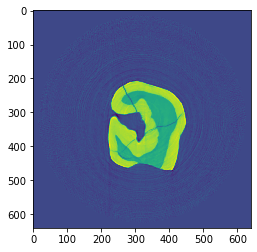

In [8]:
recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.lprec,
                     lpmethod='tve',
                     ncore=1,
                     num_iter=512,
                     reg_par=2e-4)
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

Reconstruction using the TV-l1 method with the log-polar coordinates. It can be used to remove
structures of an image of a certain scale, and the regularization parameter $\lambda$ can be used for scale selection. 
$$ \hat{f} = \text{argmin}_f\lVert\mathcal{R}f-g \rVert_1 + \lambda \lVert\nabla f\rVert_1 $$


Reconstructing 1 slice groups with 1 master threads...


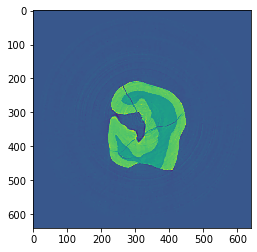

In [9]:
recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.lprec,
                     lpmethod='tvl1',
                     ncore=1,
                     num_iter=512,
                     reg_par=3e-2)
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

Reconstruction using the MLEM method with the log-polar coordinates.

Reconstructing 1 slice groups with 1 master threads...


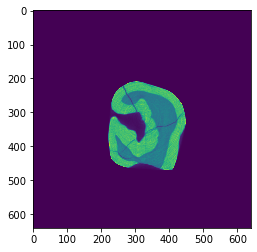

In [10]:
recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.lprec,
                     lpmethod='em',
                     ncore=1,
                     num_iter=64,
                     reg_par=0.05)
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()